In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [2]:
# load data
data = pd.read_csv('Task 3 and 4_Loan_Data.csv')
fico_scores = data['fico_score']
defaults = data['default']

In [3]:
# define buckets number 
num_buckets = 5

In [12]:
# define log likelihood function
def log_likelihood(buckets, data):
    total_ll = 0
    for i in range(len(buckets) - 1):
        bucket_data = data[(data['fico_score'] >= buckets[i]) & (data['fico_score'] < buckets[i + 1])]
        n_i = len(bucket_data)
        k_i = bucket_data['default'].sum()
        
        if n_i > 0:
            p_i = k_i / n_i
            total_ll += (k_i * np.log(p_i) + (n_i - k_i) * np.log(1 - p_i))
    
    return total_ll

In [13]:
# initialize boundaries
def initial_buckets(num_buckets, min_score=300, max_score=850):
    return np.linspace(min_score, max_score, num_buckets + 1)

In [14]:
# optimize
def optimize_buckets(initial_buckets, data):
    def objective_function(buckets):
        return -log_likelihood(buckets, data)
    result = minimize(objective_function, initial_buckets, bounds=[(300, 850)] * len(initial_buckets))
    return result.x

In [15]:
# example with 5 buckets
num_buckets = 5  
initial_buckets = initial_buckets(num_buckets)
optimized_buckets = optimize_buckets(initial_buckets, data)
print("Optimal Boundaries:", optimized_buckets)

Optimal Boundaries: [300.         410.         520.00000752 630.00000501 740.00000251
 850.        ]


In [16]:
# rating system
def create_rating_map(buckets):
    rating_map = {}
    for i in range(len(buckets) - 1):
        rating_map[(buckets[i], buckets[i + 1])] = num_buckets - i 
    return rating_map

rating_map = create_rating_map(optimized_buckets)
print("Rating Map:", rating_map)

Rating Map: {(300.0, 410.0): 5, (410.0, 520.0000075191823): 4, (520.0000075191823, 630.0000050127883): 3, (630.0000050127883, 740.0000025063941): 2, (740.0000025063941, 850.0): 1}


In [17]:
# check likelihood
ll_value = log_likelihood(optimized_buckets, data)
print("Log-Likelihood value:", ll_value)

Log-Likelihood value: -4357.732154300903


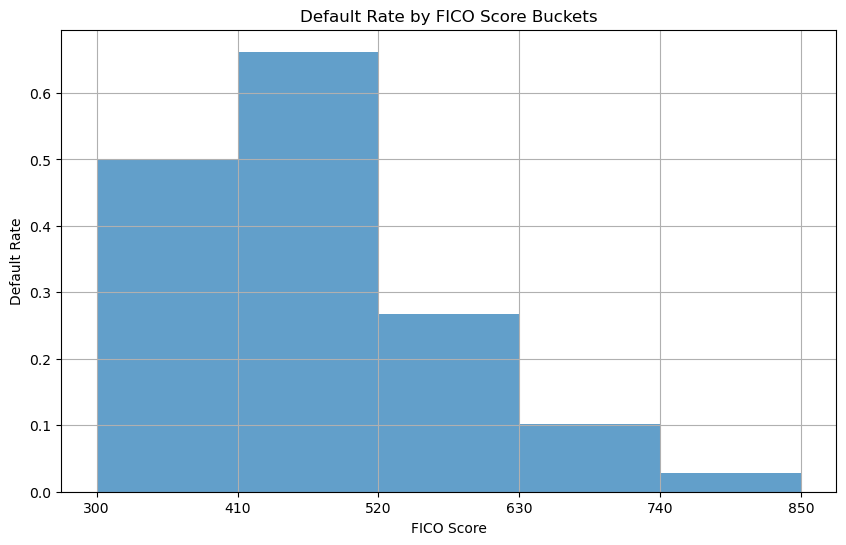

In [18]:
# visualize
def plot_default_rates(buckets, data):
    default_rates = []
    bucket_centers = []

    for i in range(len(buckets) - 1):
        bucket_data = data[(data['fico_score'] >= buckets[i]) & (data['fico_score'] < buckets[i + 1])]
        n_i = len(bucket_data)
        k_i = bucket_data['default'].sum()
        
        if n_i > 0:
            p_i = k_i / n_i
            default_rates.append(p_i)
            bucket_centers.append((buckets[i] + buckets[i + 1]) / 2)
        else:
            default_rates.append(0)
            bucket_centers.append((buckets[i] + buckets[i + 1]) / 2)

    plt.figure(figsize=(10, 6))
    plt.bar(bucket_centers, default_rates, width=np.diff(buckets), align='center', alpha=0.7)
    plt.xlabel('FICO Score')
    plt.ylabel('Default Rate')
    plt.title('Default Rate by FICO Score Buckets')
    plt.xticks(buckets)
    plt.grid()
    plt.show()

plot_default_rates(optimized_buckets, data)